<a href="https://colab.research.google.com/github/Ansh16022004/Color-Delection/blob/main/Color_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cv2_image_color_detection_projectVHBL91.webp to cv2_image_color_detection_projectVHBL91.webp


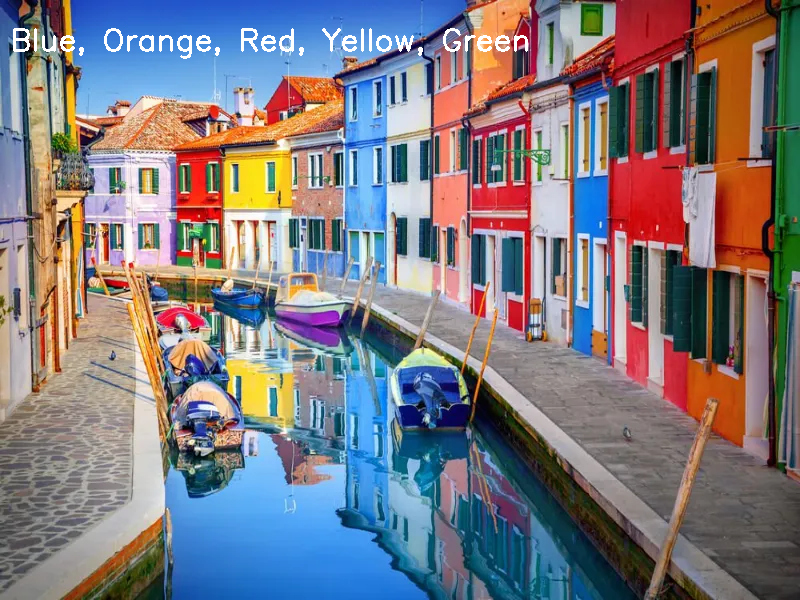

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import io
import PIL.Image as Image

def detect_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges (HSV format)
    color_ranges = {
        "Red": [(0, 120, 70), (10, 255, 255)],
        "Green": [(36, 100, 100), (86, 255, 255)],
        "Blue": [(94, 80, 2), (126, 255, 255)],
        "Yellow": [(15, 150, 150), (35, 255, 255)],
        "Orange": [(10, 100, 100), (20, 255, 255)],

     }

    detected_colors = []

    for color, (lower, upper) in color_ranges.items():
        mask = cv2.inRange(hsv, np.array(lower), np.array(upper))
        count = cv2.countNonZero(mask)
        if count > 500:  # Threshold to filter small noise
            detected_colors.append((color, count))

    # Sort colors by pixel count (descending order)
    detected_colors.sort(key=lambda x: x[1], reverse=True)

    return [color for color, _ in detected_colors]

def main():
    # Upload image
    uploaded = files.upload()

    for filename in uploaded.keys():
        image = Image.open(io.BytesIO(uploaded[filename]))
        image = np.array(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        detected_colors = detect_color(image)
        text = ", ".join(detected_colors) if detected_colors else "No Color Detected"
        cv2.putText(image, text, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        cv2_imshow(image)

if __name__ == "__main__":
    main()
